<a href="https://colab.research.google.com/github/datatechnew/DA_basic_sample/blob/master/pandas_foundation_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

**Indexing Time Series**
read_csv()function:
*   can read strings into dattime objects
*   need to specify 'parse_dates=True'

**ISO 8601 format: yyyy-mm-dd hh:mm:ss**


In [0]:
# create a datetime file for later analysis
Date = ['2019-08-01 08:00:00', '2019-08-15 12:00:00','2019-08-30 20:00:00',
        '2019-09-01 08:01:00','2019-09-15 12:01:00','2019-09-30 20:01:00',
        '2019-10-01 08:02:00','2019-10-15 12:02:00','2019-10-30 20:02:00']

Company = ['Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon']

Product = ['iphone', 'XBox', 'Mop', 
           'ipad', 'Surface', 'Decoration',
           'MacPro', 'Office365', 'Pen']

Units = ['1', '1', '2',
         '2', '1', '1',
         '1', '6', '10',]

In [8]:
data = {'Date': Date, 'Company': Company, 'Product': Product, 'Units': Units}
df = pd.DataFrame(data)
df

,Date,Company,Product,Units
0,2019-08-01 08:00:00,Apple,iphone,1
1,2019-08-15 12:00:00,Microsoft,XBox,1
2,2019-08-30 20:00:00,Amazon,Mop,2
3,2019-09-01 08:01:00,Apple,ipad,2
4,2019-09-15 12:01:00,Microsoft,Surface,1
5,2019-09-30 20:01:00,Amazon,Decoration,1
6,2019-10-01 08:02:00,Apple,MacPro,1
7,2019-10-15 12:02:00,Microsoft,Office365,6
8,2019-10-30 20:02:00,Amazon,Pen,10


In [0]:
from google.colab import files
df.to_csv('sales_data.csv')
files.download('sales_data.csv')

In [10]:
from google.colab import files 
uploaded = files.upload()

#include parse_dates otherwise formate will be object
sales = pd.read_csv('sales_data.csv', parse_dates=True, index_col='Date')

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-08-01 08:00:00 to 2019-10-30 20:02:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9 non-null      int64 
 1   Company     9 non-null      object
 2   Product     9 non-null      object
 3   Units       9 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 360.0+ bytes


In [12]:
sales.head()

,Unnamed: 0,Company,Product,Units
Date,,,,
2019-08-01 08:00:00,0,Apple,iphone,1
2019-08-15 12:00:00,1,Microsoft,XBox,1
2019-08-30 20:00:00,2,Amazon,Mop,2
2019-09-01 08:01:00,3,Apple,ipad,2
2019-09-15 12:01:00,4,Microsoft,Surface,1


In [0]:
sales = sales.drop(columns= 'Unnamed: 0')

In [14]:
sales.head()

,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iphone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,ipad,2
2019-09-15 12:01:00,Microsoft,Surface,1


In [15]:
# .loc method can select data by row/column
sales.loc['2019-08-01 08:00:00', 'Company']

'Apple'

In [16]:
# .loc by date
sales.loc['2019-09-01']

,Company,Product,Units
Date,,,
2019-09-01 08:01:00,Apple,ipad,2


In [17]:
# .loc by month
sales.loc['2019-09']

,Company,Product,Units
Date,,,
2019-09-01 08:01:00,Apple,ipad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1


In [18]:
# alternative way
sales.loc['October, 2019']

,Company,Product,Units
Date,,,
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


In [19]:
# slicing uising date/time
sales.loc['2019-08': '2019-10']

,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iphone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,ipad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


In [20]:
#covert stings to datetime
time = pd.to_datetime(['2019-10-01 08:02', '2019-10-02 20:00',
                       '2019-10-03 20:00','2019-10-15 12:02'])
time

DatetimeIndex(['2019-10-01 08:02:00', '2019-10-02 20:00:00',
               '2019-10-03 20:00:00', '2019-10-15 12:02:00'],
              dtype='datetime64[ns]', freq=None)

In [21]:
#reindexing involves providing a new index and matching data as required
sales.reindex(time)

,Company,Product,Units
2019-10-01 08:02:00,Apple,MacPro,1.0
2019-10-02 20:00:00,NaN,NaN,NaN
2019-10-03 20:00:00,NaN,NaN,NaN
2019-10-15 12:02:00,Microsoft,Office365,6.0


In [22]:
# forward fill
sales.reindex(time, method='ffill')

,Company,Product,Units
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-02 20:00:00,Apple,MacPro,1
2019-10-03 20:00:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6


In [23]:
# backward fill
sales.reindex(time, method='bfill')

,Company,Product,Units
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-02 20:00:00,Microsoft,Office365,6
2019-10-03 20:00:00,Microsoft,Office365,6
2019-10-15 12:02:00,Microsoft,Office365,6


Resamping
* statistical methods over different time intervals: mean(),sum(), count(),etc
* Downsamping: reduce dattime rows to slower frequency, ie going from hourly to daily
* upsampling: increase datetime rows to faster frequency, ie going from daily to hourly






In [24]:
#Aggregating means
daily_mean = sales.resample('D').mean()
daily_mean.head()

,Units
Date,
2019-08-01,1.0
2019-08-02,NaN
2019-08-03,NaN
2019-08-04,NaN
2019-08-05,NaN


In [25]:
daily_mean = sales.resample('M').mean()
daily_mean

,Units
Date,
2019-08-31,1.333333
2019-09-30,1.333333
2019-10-31,5.666667


In [26]:
#verifying
daily_mean.loc['2019-10-31']

Units    5.666667
Name: 2019-10-31 00:00:00, dtype: float64

In [27]:
sales.loc['2019-10', 'Units']

Date
2019-10-01 08:02:00     1
2019-10-15 12:02:00     6
2019-10-30 20:02:00    10
Name: Units, dtype: int64

In [29]:
#sales the most in that month
sales.resample('M').sum().max()

Units    17
dtype: int64

In [30]:
#by week
sales.resample('W').count()

,Company,Product,Units
Date,,,
2019-08-04,1,1,1
2019-08-11,0,0,0
2019-08-18,1,1,1
2019-08-25,0,0,0
2019-09-01,2,2,2
2019-09-08,0,0,0
2019-09-15,1,1,1
2019-09-22,0,0,0
2019-09-29,0,0,0


In [31]:
#multiploying frequencies//every 6 weeks
sales.loc[:, 'Units'].resample('6W').sum()

Date
2019-08-04     1
2019-09-15     6
2019-10-27     8
2019-12-08    10
Freq: 6W-SUN, Name: Units, dtype: int64

In [33]:
#unsampeling and filling
one_day = sales.loc['2019-10-01': '2019-10-30', 'Units']
one_day

Date
2019-10-01 08:02:00     1
2019-10-15 12:02:00     6
2019-10-30 20:02:00    10
Name: Units, dtype: int64

In [35]:
# resample to 4 hours//backfill values//uising 6 to fill
one_day.resample('4H').bfill()

Date
2019-10-01 08:00:00     1
2019-10-01 12:00:00     6
2019-10-01 16:00:00     6
2019-10-01 20:00:00     6
2019-10-02 00:00:00     6
                       ..
2019-10-30 04:00:00    10
2019-10-30 08:00:00    10
2019-10-30 12:00:00    10
2019-10-30 16:00:00    10
2019-10-30 20:00:00    10
Freq: 4H, Name: Units, Length: 178, dtype: int64

In [36]:
#increase linearly 
one_day.resample('4H').first().interpolate('linear')


Date
2019-10-01 08:00:00     1.000000
2019-10-01 12:00:00     1.058824
2019-10-01 16:00:00     1.117647
2019-10-01 20:00:00     1.176471
2019-10-02 00:00:00     1.235294
                         ...    
2019-10-30 04:00:00     9.826087
2019-10-30 08:00:00     9.869565
2019-10-30 12:00:00     9.913043
2019-10-30 16:00:00     9.956522
2019-10-30 20:00:00    10.000000
Freq: 4H, Name: Units, Length: 178, dtype: float64

In [37]:
one_day.resample('4H').interpolate('linear')

Date
2019-10-01 08:00:00   NaN
2019-10-01 12:00:00   NaN
2019-10-01 16:00:00   NaN
2019-10-01 20:00:00   NaN
2019-10-02 00:00:00   NaN
                       ..
2019-10-30 04:00:00   NaN
2019-10-30 08:00:00   NaN
2019-10-30 12:00:00   NaN
2019-10-30 16:00:00   NaN
2019-10-30 20:00:00   NaN
Freq: 4H, Name: Units, Length: 178, dtype: float64

**#Manipulating Time Series Data**

In [42]:
# add index number back to the dataset/ see date as feature
sales = pd.read_csv('sales_data.csv', parse_dates = ['Date'], index_col='Unnamed: 0')
sales

,Date,Company,Product,Units
0,2019-08-01 08:00:00,Apple,iphone,1
1,2019-08-15 12:00:00,Microsoft,XBox,1
2,2019-08-30 20:00:00,Amazon,Mop,2
3,2019-09-01 08:01:00,Apple,ipad,2
4,2019-09-15 12:01:00,Microsoft,Surface,1
5,2019-09-30 20:01:00,Amazon,Decoration,1
6,2019-10-01 08:02:00,Apple,MacPro,1
7,2019-10-15 12:02:00,Microsoft,Office365,6
8,2019-10-30 20:02:00,Amazon,Pen,10


In [44]:
#string methods////.str
sales['Company'].str.upper()

0        APPLE
1    MICROSOFT
2       AMAZON
3        APPLE
4    MICROSOFT
5       AMAZON
6        APPLE
7    MICROSOFT
8       AMAZON
Name: Company, dtype: object

In [48]:
#substring matching
sales['Product'].str.contains('i').value_counts()

False    5
True     4
Name: Product, dtype: int64

In [49]:
#Datetime methods
#returns new integer series where 0 is midnight and 23 is 11pm
sales['Date'].dt.hour

0     8
1    12
2    20
3     8
4    12
5    20
6     8
7    12
8    20
Name: Date, dtype: int64

In [50]:
# Datetime methods
sales['Date'].dt.tz_localize('US/Eastern')

0   2019-08-01 08:00:00-04:00
1   2019-08-15 12:00:00-04:00
2   2019-08-30 20:00:00-04:00
3   2019-09-01 08:01:00-04:00
4   2019-09-15 12:01:00-04:00
5   2019-09-30 20:01:00-04:00
6   2019-10-01 08:02:00-04:00
7   2019-10-15 12:02:00-04:00
8   2019-10-30 20:02:00-04:00
Name: Date, dtype: datetime64[ns, US/Eastern]

In [52]:
#check google for tz.covert time zone list first
sales['Date'].dt.tz_localize('US/Eastern').dt.tz_convert('Europe/Paris')

0   2019-08-01 14:00:00+02:00
1   2019-08-15 18:00:00+02:00
2   2019-08-31 02:00:00+02:00
3   2019-09-01 14:01:00+02:00
4   2019-09-15 18:01:00+02:00
5   2019-10-01 02:01:00+02:00
6   2019-10-01 14:02:00+02:00
7   2019-10-15 18:02:00+02:00
8   2019-10-31 01:02:00+01:00
Name: Date, dtype: datetime64[ns, Europe/Paris]

**#Time Series Visualization**

In [60]:
#datetime as index
sales = pd.read_csv('sales_data.csv', parse_dates=True, index_col = 'Date')
sales = sales.drop(columns ='Unnamed: 0')
sales


,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iphone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,ipad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


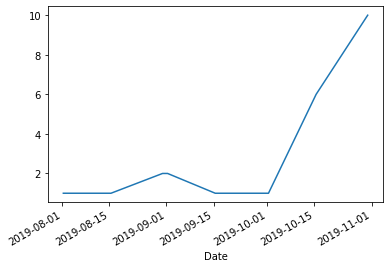

In [61]:
#pandas plot
sales['Units'].plot()

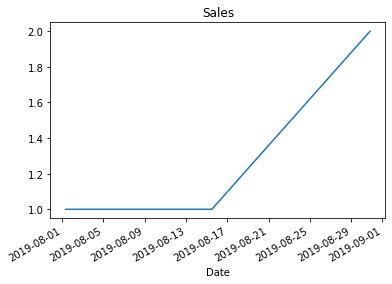

In [62]:
#plot by month
sales.loc['2019-08-01': '2019-08-31', 'Units'].plot(title='Sales')

Text(0, 0.5, 'Units')

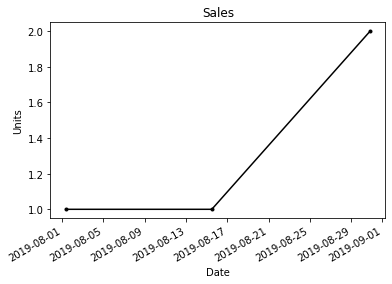

In [65]:
#plot style
sales.loc['2019-08-01':'2019-08-31', 'Units'].plot(style='k.-',title = 'Sales')
plt.ylabel('Units')

Text(0, 0.5, 'Units')

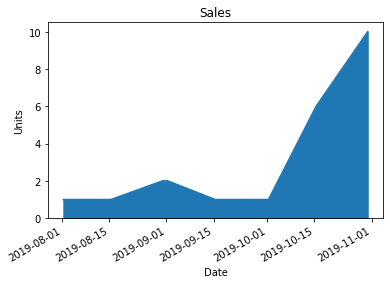

In [69]:
#Area plot
sales['Units'].plot(kind='area', title = 'Sales')
plt.ylabel('Units')

In [73]:
price = [999, 300, 10, 1399, 1299, 99, 2999, 199, 20]
sales['Price$'] = price
sales

,Company,Product,Units,Price$
Date,,,,
2019-08-01 08:00:00,Apple,iphone,1,999
2019-08-15 12:00:00,Microsoft,XBox,1,300
2019-08-30 20:00:00,Amazon,Mop,2,10
2019-09-01 08:01:00,Apple,ipad,2,1399
2019-09-15 12:01:00,Microsoft,Surface,1,1299
2019-09-30 20:01:00,Amazon,Decoration,1,99
2019-10-01 08:02:00,Apple,MacPro,1,2999
2019-10-15 12:02:00,Microsoft,Office365,6,199
2019-10-30 20:02:00,Amazon,Pen,10,20


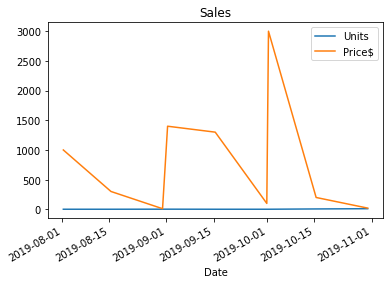

In [74]:
# mulitcolumns without subplot
sales.loc['2019', ['Units', 'Price$']].plot(title = 'Sales')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2396a08080>,
      dtype=object)

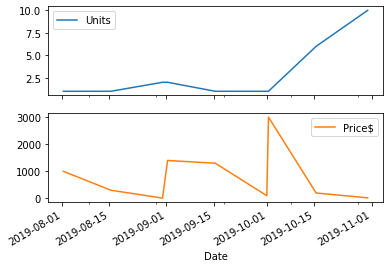

In [76]:
#using subplot///units/price vary a lot near 10-15
sales.loc['2019', ['Units', 'Price$']].plot(subplots =True)